# Let's test how to load and manipulate a Nexus File #

### A few words on the Nexus hierarchical structure and classes ###

`NeXus` Objects are used to handle Xray and muon experiment with a domanin specific dictionary 
evaluated by NIAC supervision.
Community users can submit dictionary implementations
related to the full description of their measurements data

`NeXus` files are suitable for __raw data__ as well as for
__processed data__. <br>
`NeXus` data is stored as a hierarchical tree structure <br>.


The structure is made of entities: **groups**, **fields**, **attributes** and **links** <br>
__groups__ are __containers /folders__ of fields and other groups<br>
__fields__ are array and scalars <br> 
__attributes__ are extra info of groups and fields

The `Nexus` *classes* are objects for the experiment data descriptions:<br>
 *base classes* and *applications* <br>
Each __group__ has a name and a *class* defining it.<br>
The *class* tells about the type of object and the *name* identifies it <br>
https://manual.nexusformat.org
the Application definition list which elements are necessary to describe an application

In [ ]:
An additional class is contributed definitions initiated by the community

## Load a file compatible with icat ingestion ##

There is a number of GUI options to load `HDF5` data. Here we show how to use `NexPy`, `HDFView` <bc>
as well as command line to upload and manipulate the `NeXus` files

### The use of the GUI `NexusWriter` by Gerrit Günther, facilitate the dictionary exploration. ###
### It enables a user friendly data curation and a later ingestion in Icat repository ###
### It works from GUI or command line and is optimize for use cases of BESSY II instruments ###

### Case 1 : Commands in Python environment ###

We use `Python` shell and built in functions to:<br>
handle array of data <br>
plot the data array <br>
handle `xml` structures <br>
save the array of data in `ASCII` format

We also use a `Python` package to read `HDF5` file formats and `Python` packages by `nexusformat.org`

In [1]:
from nexusformat.nexus import *
from matplotlib import pyplot as plt
import numpy as np
import  json
import h5py
from dicttoxml import dicttoxml

We load a `Nexus` file created by Gerrit Gunther for the icat ingestion of `BESSY II` measurement data

In [60]:
path='/home/luigia/Documents/metadata_course/data_public1_HZB/'
filename='Co02_2021-03-30.nxs'
#filename='Fe01O03ac_3_2017-08-09.nxs'
filename='Dy01Cp02_2_2018-12-13.nxs'
#%2021-03-Dy01Cp02_2.nxs'
fp=path+filename
a=nxload(fp,'rw')

Let's have a look at the file structure and its content

We handle the object a as a dictionary and we use the dictionary exploration tools in Python

In [61]:
print(a)
a.keys()

root


dict_keys(['background', 'entry'])

We can visualize the whole hierarchical structure

In [62]:
print(a.tree)

root:NXroot
  @H5PY_version = '3.2.1'
  @default = 'entry'
  @file_time = '2021-11-05T12:55:24+01:00'
  background:NXgroup
    data:NXdata
      @axis = 'time-of-flight'
      @default = 'signal'
      @time-of-flight_indices = 0
      signal = [[137 160 147 ... 198 185 212]]
        @units = 'counts'
      time-of-flight = float32(10)
        @units = 's'
    definition = 'NXxas'
      @URL = 'https://manual.nexusformat.org/classes/applica...'
      @version = 'v2020.10'
    entry_identifier = 'Dy01Cp02_2'
    experiment_documentation:NXnote
      @default = '/proposal'
      author = 'Günther, Gerrit'
      description = 'Temperature dependence of Bragg peaks in novel low dimen...'
      file_name = '162-04361-EF.pdf'
      type = 'application/pdf'
    instrument:NXgroup
      @default = 'tof_mass_spectrum'
      absorbed_beam:NXdetector
        @name = 'absorbed_beam'
        @short_name = 'xas2'
        type = 'photo diode'
      incoming_beam:NXdetector
        @name = 'incoming_b

Instrument DOI inserted in the notes: `@URL = 'https://doi.org/10.5442/ni000004'`

the @ indicates attributes

'Ni01CO04_001_Mono.txt' is a reference/link file

the xml dictionary or `NeXus` application definition used for the measurements description is given

`definition = 'NXxas'
      @URL = 'https://manual.nexusformat.org/classes/applica...'`

The sample description goes in `NXsample`

`sample:NXsample`

For this specific case the object entries are 2: one is called background, the other entry. <br>
    They refer to data relative to the tests on the instruments and the measurements data on a sample.<br>
    The keys __background__ and __entry__ help to distinguish the 2 groups of data

## Explore the file content ##

Looping over the dictionary entries

In [63]:
for item in a.entry.keys():
    print(item+ ":",a.entry[item])

entry_identifier: Dy01Cp02_2
start_time: 2018-12-13T17:15:59+01:00
instrument: instrument
sample: sample
experiment_documentation: experiment_documentation
user1: user1
user2: user2
notes: notes
definition: NXxas
integrated_intensity: integrated_intensity
data: data


We can visualize and manipulate the file entries with different approaches: <br>
- Direct assignment: <br>

`x = NXfield(np.linspace(0,2*np.pi,101), units='degree')` <br>

- Attribute assignment as the child of a `NeXus` group, <br> 

#%a.entry.sample.temperature=40.0

- Dictionary assignment to the `NeXus` group

We will see all the options in the coming lines

#### Visualize the dictionary keys ####

In [64]:
a['/entry'].keys()

dict_keys(['entry_identifier', 'start_time', 'instrument', 'sample', 'experiment_documentation', 'user1', 'user2', 'notes', 'definition', 'integrated_intensity', 'data'])

#### Access the data and plot them ####

Note that the axis and title labels are already given in the Nx group data

[3.3407e-14 3.6712e-14 3.9921e-14]


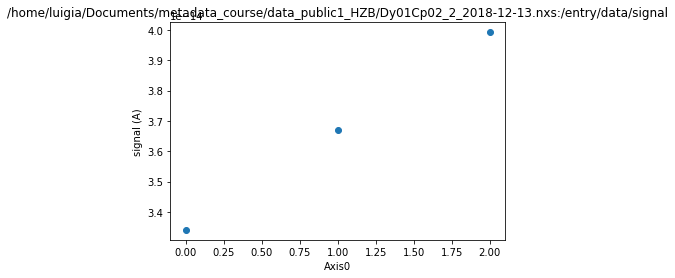

In [65]:
b=(a['/entry/data/signal'])
print(b)
b.plot()



`NeXus` data  are stored in a class `NXfield`: <bc>
`NXdata` contains the array of data and axes definition <bc> 
 Additional classes are used to describe acquisition and processing settings

In the `NXfield` are allowed `NumPy` arrays, scalars, and attributes /additional metadata

#### Visualize which Nexus application has been used to describe these data ####

In [66]:
a['/background']

NXgroup('background')

More on the NXxas application: https://manual.nexusformat.org/classes/applications/NXxas.html

When using an application is mandatory to consider which elements are required 

Details of the xml structure for NXxas application :https://github.com/nexusformat/definitions/blob/main/applications/NXsas.nxdl.xml

<?xml version="1.0" encoding="UTF-8"?>
<?xml-stylesheet type="text/xsl" href="nxdlformat.xsl" ?>
<!--
# NeXus - Neutron and X-ray Common Data Format
# 
# Copyright (C) 2008-2021 NeXus International Advisory Committee (NIAC)
# 
# This library is free software; you can redistribute it and/or
# modify it under the terms of the GNU Lesser General Public
# License as published by the Free Software Foundation; either
# version 3 of the License, or (at your option) any later version.
#
# This library is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the GNU
# Lesser General Public License for more details.
#
# You should have received a copy of the GNU Lesser General Public
# License along with this library; if not, write to the Free Software
# Foundation, Inc., 59 Temple Place, Suite 330, Boston, MA  02111-1307  USA
#
# For further information, see http://www.nexusformat.org
-->
<definition name="NXsas" extends="NXobject" type="group"
  category="application"
  xmlns="http://definition.nexusformat.org/nxdl/3.1"
  xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"
  xsi:schemaLocation="http://definition.nexusformat.org/nxdl/3.1 ../nxdl.xsd"
  >
  <symbols>
    <doc>
	  The symbol(s) listed here will be used below to coordinate datasets with the same shape.
	</doc>
	<symbol name="nXPixel">
	  <doc>nXPixel description</doc>
	</symbol>
	<symbol name="nYPixel">
	  <doc>nYPixel description</doc>
	</symbol>
  </symbols>
  <doc>
    raw, monochromatic 2-D SAS data with an area detector

    This is an application definition for raw data (not processed or reduced data) 
    from a 2-D small angle scattering instrument collected with a monochromatic 
    beam and an area detector. It is meant to be suitable both for neutron SANS 
    and X-ray SAXS data. 
    
    It covers all raw data from any monochromatic SAS techniques that
    use an area detector: SAS, WSAS, grazing incidence, GISAS

    It covers all raw data from any SAS techniques
    that use an area detector
    and a monochromatic beam.
  </doc>
  <group type="NXentry">
    <attribute name="entry">
      <doc>
		NeXus convention is to use ``entry1``, ``entry2``, ... 
		for analysis software to locate each entry
      </doc>
    </attribute>
    <field name="title"/>
    <field name="start_time" type="NX_DATE_TIME"/>
    <field name="end_time" type="NX_DATE_TIME"/>
    <field name="definition">
      <doc> Official NeXus NXDL schema to which this file conforms </doc>
      <enumeration>
        <item value="NXsas"/>
      </enumeration>
    </field>
    <group type="NXinstrument" name="instrument">
      <group type="NXsource" name="source">
        <field name="type">
          <doc>type of radiation source</doc>
        </field>
        <field name="name">
          <doc>Name of the radiation source</doc>
        </field>
        <field name="probe">
          <enumeration>
            <item value="neutron"/>
            <item value="x-ray"/>
          </enumeration>
        </field>
      </group>
      <group type="NXmonochromator" name="monochromator">
        <field name="wavelength" units="NX_WAVELENGTH" type="NX_FLOAT">
          <doc>The wavelength of the radiation</doc>
        </field>
        <field name="wavelength_spread" type="NX_FLOAT">
          <doc>
	          delta_lambda/lambda (:math:`\Delta\lambda/\lambda`):
	          Important for resolution calculations
          </doc>
        </field>
      </group>
      <group type="NXcollimator" name="collimator">
        <group type="NXgeometry" name="geometry">
          <group type="NXshape" name="shape">
            <field name="shape" type="NX_CHAR">
              <enumeration>
                <item value="nxcylinder"/>
                <item value="nxbox"/>
              </enumeration>
            </field>
            <field name="size" type="NX_FLOAT" units="NX_LENGTH">
              <doc>The collimation length</doc>
            </field>
          </group>
        </group>
      </group>
      <group type="NXdetector" name="detector">
        <field name="data" type="NX_NUMBER" signal="1">
          <doc>
            This is area detector data, of number of x-pixel versus
            number of y-pixels. Since the beam center is to be
            determined as a step of data reduction, it is not necessary
            to document or assume the position of the beam center in
            acquired data.
          </doc>
          <dimensions rank="2">
            <dim index="1" value="nXPixel" />
            <dim index="2" value="nYPixel" />
          </dimensions>
        </field>
        <field name="distance" type="NX_FLOAT" units="NX_LENGTH">
          <doc>The distance between detector and sample</doc>
        </field>
        <field name="x_pixel_size" type="NX_FLOAT" units="NX_LENGTH">
          <doc>Physical size of a pixel in x-direction</doc>
        </field>
        <field name="y_pixel_size" type="NX_FLOAT" units="NX_LENGTH">
          <doc>Size of a pixel in y direction</doc>
        </field>
        <field name="polar_angle" type="NX_FLOAT" units="NX_ANGLE"></field>
        <field name="azimuthal_angle" type="NX_FLOAT"
          units="NX_ANGLE">
        </field>
        <field name="rotation_angle" type="NX_FLOAT" units="NX_ANGLE"></field>
        <field name="aequatorial_angle" type="NX_FLOAT"
          units="NX_ANGLE">
        </field>
		<field name="beam_center_x" type="NX_FLOAT" units="NX_LENGTH">
			<doc>
				This is the x position where the direct beam would hit the detector. This is a
				length, not a pixel position, and can be outside of the actual detector.
			</doc>
		</field>
        <field name="beam_center_y" type="NX_FLOAT" units="NX_LENGTH">
			<doc>
				This is the y position where the direct beam would hit the detector. This is a
				length, not a pixel position, and can be outside of the actual detector.
			</doc>
		</field>
      </group>
      <field name="name" type="NX_CHAR">
        <doc>Name of the instrument actually used to perform the experiment</doc>
      </field>
    </group>
    <group type="NXsample" name="sample">
      <field name="name">
        <doc>Descriptive name of sample</doc>
      </field>
      <field name="aequatorial_angle" type="NX_FLOAT"
        units="NX_ANGLE">
      </field>
    </group>
    <group type="NXmonitor" name="control">
      <field name="mode">
        <doc>
			Count to a preset value based on either clock time 
			(timer) or received monitor counts (monitor). 
        </doc>
        <enumeration>
          <item value="monitor"/>
          <item value="timer"/>
        </enumeration>
      </field>
      <field name="preset" type="NX_FLOAT">
        <doc>preset value for time or monitor</doc>
      </field>
      <field name="integral" type="NX_FLOAT" units="NX_ANY">
        <doc>Total integral monitor counts</doc>
      </field>
    </group>
    <group type="NXdata" name="data">
      <link name="data" target="/NXentry/NXinstrument/NXdetector/data"></link>
    </group>
  </group>
</definition>

#### Let's continue to explore the `Nexus` fields ####

In [67]:
a['/entry/'].keys()

dict_keys(['entry_identifier', 'start_time', 'instrument', 'sample', 'experiment_documentation', 'user1', 'user2', 'notes', 'definition', 'integrated_intensity', 'data'])

In [68]:
print(a['/entry/instrument'].keys())

dict_keys(['name', 'source', 'incoming_beam', 'absorbed_beam', 'tof_mass_spectrum', 'insertion_device', 'monochromator', 'slitwidth'])


In [69]:
print(a['/entry/sample'].keys())

dict_keys(['name', 'type', 'situation', 'temperature_env', 'pressure_env'])


Let's explore the parameter using the access to the child of a NeXus group 

In [70]:
a.entry.sample

NXgroup('sample')

In [71]:
a.entry.sample.type

NXfield('sample')

In [72]:
print(a.entry.sample.type)

sample


In [73]:
print(a.entry.keys())

dict_keys(['entry_identifier', 'start_time', 'instrument', 'sample', 'experiment_documentation', 'user1', 'user2', 'notes', 'definition', 'integrated_intensity', 'data'])


In [74]:
a.entry.instrument

NXgroup('instrument')

In [75]:
a.entry.data

NXdata('data')

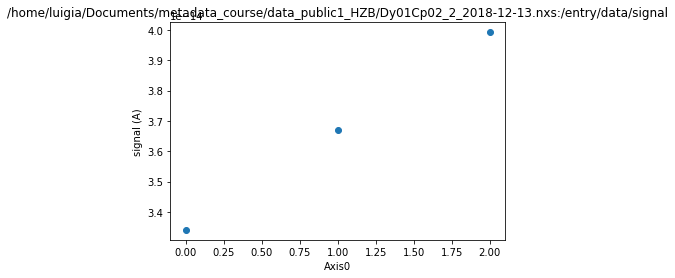

In [76]:
a.entry.data.signal.plot()

In [77]:
a.entry.keys()

dict_keys(['entry_identifier', 'start_time', 'instrument', 'sample', 'experiment_documentation', 'user1', 'user2', 'notes', 'definition', 'integrated_intensity', 'data'])

In [78]:
a.entry.instrument.keys()

dict_keys(['name', 'source', 'incoming_beam', 'absorbed_beam', 'tof_mass_spectrum', 'insertion_device', 'monochromator', 'slitwidth'])

In [79]:
a.entry.instrument.monochromator

NXmonochromator('monochromator')

In [80]:
print(a.entry.instrument.monochromator.keys())

dict_keys(['energy', 'energy_set'])


In [81]:
a.entry.instrument.monochromator.energy

NXfield(array([1274.99, 1275.6 , 1276.2 ]))

We can manipulate this entry and assign a new name to the detector,

keep in mind that the modifications are automatically saved in file

In [82]:
a['entry/instrument/name']

NXfield('UE52_PGM Iontrap')

In [83]:
a['entry/instrument/detector1/type']

NeXusError: Invalid path

In [84]:
a.entry.instrument.detector1.name

NeXusError: 'detector1' not in /entry/instrument

In [85]:
a.entry.instrument.detector1.type

NeXusError: 'detector1' not in /entry/instrument

In [86]:
a.entry.instrument.detector1.signal

NeXusError: 'detector1' not in /entry/instrument

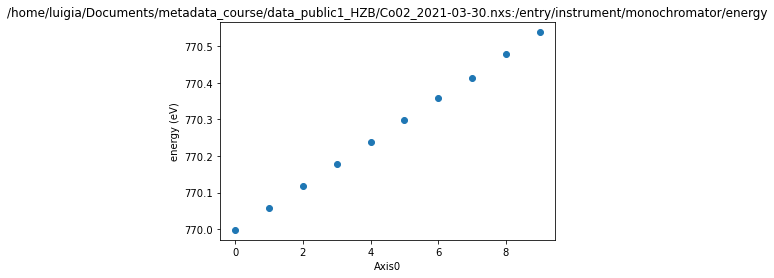

In [31]:
a.entry.instrument.monochromator.energy.plot()

https://manual.nexusformat.org/classes/base_classes/index.html

# visualize the Nexus structure as an xml file

In [32]:
b=(a.keys())
print(b)
xml=dicttoxml(b)
print(xml)

dict_keys(['background', 'entry'])
b'<?xml version="1.0" encoding="UTF-8" ?><root><item type="str">background</item><item type="str">entry</item></root>'


each `NXgroup` is an `XML` entity

We can loop over the entries and convert the whole dictionary in an xml structure

In [34]:
a.attrs.keys()

dict_keys(['H5PY_version', 'default', 'file_time'])

In [35]:
for item in a.attrs.keys():
    print(item+":", a.attrs[item])

H5PY_version: 3.2.1
default: entry
file_time: 2021-11-05T12:55:17+01:00


In [38]:
a.entry.sample.temperature_env

NXenvironment('temperature_env')

In [56]:
x = NXfield(np.linspace(0,2*np.pi,101), units='degree')

In [138]:
sample=NXsample()

#### Save the array of data as an ASCII and  <bc>
#### preserve the metadata information as separated xml file is possible but not recommended ####
#### because the link is broken between data versions and metadata versions ####

In [37]:
a.entry.instrument.detector1.signal

NXfield(array([0.000255, 0.000255, 0.000255, ..., 0.000271, 0.000271, 0.000271]))

In [50]:
sign=a['/entry/instrument/detector1/signal']

In [51]:
len(sign)

239

In [52]:
filename="test_ASCII.txt"
ff=path+filename
f_AS=open(ff,'w')
print(f_AS)

<_io.TextIOWrapper name='/home/luigia/Documents/metadata_course/data_public1_HZB/test_ASCII.txt' mode='w' encoding='UTF-8'>


In [53]:
np.savetxt(f_AS,sign)

#### extract the dictionary from the `NeXus` file import a `silx` function http://www.silx.org/doc/silx/latest/install.html ####

In [39]:
from silx.io.dictdump import h5todict

In [40]:
nxdict=h5todict(fp)

In [42]:
nxdict['entry']['sample']

{'name': array('Co02', dtype='<U4'),
 'type': array('sample', dtype='<U6'),
 'situation': array('vacuum', dtype='<U6'),
 'temperature_env': {'short_name': array('temperature trap', dtype='<U16'),
  'temperature1': {'value': array([39.4716, 39.4726, 39.4726, ..., 39.4626, 39.4598, 39.4546])},
  'temperature2': {'value': array([40.4723, 40.4244, 40.3845, ..., 40.1108, 40.0685, 40.0108])},
  'temperature3': {'value': array([130.687, 130.521, 130.395, ..., 129.596, 129.47 , 129.296])},
  'temperature4': {'value': array([79.9454, 80.9427, 80.9898, ..., 80.0094, 79.9829, 79.9322])}},
 'pressure_env': {'pressure1': {'value': array([8.986e-07, 8.986e-07, 8.965e-07, ..., 8.954e-07, 8.922e-07,
          8.954e-07])},
  'pressure2': {'value': array([1.519e-07, 1.519e-07, 1.519e-07, ..., 1.515e-07, 1.517e-07,
          1.513e-07])},
  'pressure3': {'value': array([0.003939, 0.003944, 0.003944, ..., 0.003949, 0.003944, 0.003944])},
  'pressure4': {'value': array([2.484e-06, 2.481e-06, 2.484e-06, ..

#### Alternative option to open the `Nexus` file : h5py attributes ####

In [43]:
f=h5py.File(fp,"r")
f.attrs.keys()
for item in f.attrs.keys():
        print(item+":",f.attrs[item])

f['/entry'].keys()

#%%%%use this dictionary by changing the entries and attaching another dataset%%%%%


H5PY_version: 3.2.1
default: entry
file_time: 2021-11-05T12:55:17+01:00


<KeysViewHDF5 ['entry_identifier', 'start_time', 'instrument', 'sample', 'experiment_documentation', 'user1', 'user2', 'notes', 'definition', 'integrated_intensity', 'data']>

In [44]:
f.attrs

<Attributes of HDF5 object at 140376988473008>

In [45]:
print(f)

<HDF5 file "Co02_2021-03-30.nxs" (mode r)>


In [50]:
print(f['/entry/sample/temperature_env'])

<HDF5 group "/entry/sample/temperature_env" (5 members)>


In [51]:
import json
dictio=json.dumps(a.entry.tree).split('\\n')
dictio

['"entry:NXgroup',
 "  @default = 'data'",
 '  data:NXdata',
 "    @default = 'signal'",
 '    signal = float64(10)',
 "      @units = 'A'",
 "  definition = 'NXxas'",
 "    @URL = 'https://manual.nexusformat.org/classes/applica...'",
 "    @version = 'v2020.10'",
 "  entry_identifier = 'Co02'",
 '  experiment_documentation:NXnote',
 "    @default = '/proposal'",
 "    author = 'G\\u00fcnther, Gerrit'",
 "    description = 'Temperature dependence of Bragg peaks in novel low dimen...'",
 "    file_name = '162-04361-EF.pdf'",
 "    type = 'application/pdf'",
 '  instrument:NXgroup',
 "    @default = 'absorbed_beam'",
 '    absorbed_beam:NXdetector',
 "      @default = 'signal'",
 "      @name = 'absorbed_beam'",
 "      @short_name = 'xas2'",
 '      flux = float64(10)',
 "        @units = '1/s'",
 '      signal = float64(10)',
 "        @units = 'A'",
 "      type = 'photo diode'",
 '    incoming_beam:NXdetector',
 "      @default = 'signal'",
 "      @name = 'incoming_beam'",
 "      @

### NeXus files and ICAT data ingestions ###

The `NeXus` file entries are mapped to the ICAT metadata schema to enable the data ingestion

In [13]:
from flatten_dict import flatten
filename=path+'icatParameterList.json'
fo=open(filename)
icat_dict=json.load(fo)
print(icat_dict)

{'nxs/entry/program_name': {'type': 'STRING', 'units': 'N/A'}, 'nxs/entry/comment/data': {'type': 'STRING', 'units': 'N/A'}, 'nxs/entry/intensityIntegrationProcess/intensity': {'type': 'NUMERIC', 'units': 'a.u.'}, 'nxs/entry/intensityIntegrationProcess/mode': {'type': 'STRING', 'units': 'N/A'}, 'nxs/entry/data/absorbed_beam': {'type': 'NUMERIC', 'units': 'A'}, 'nxs/entry/data/energy': {'type': 'NUMERIC', 'units': 'eV'}, 'nxs/entry/instrument/detector1/long_name': {'type': 'STRING', 'units': 'N/A'}, 'nxs/entry/instrument/detector1/short_name': {'type': 'STRING', 'units': 'N/A'}, 'nxs/entry/instrument/detector1/data': {'type': 'NUMERIC', 'units': 'A'}, 'nxs/entry/instrument/detector1/type': {'type': 'STRING', 'units': 'N/A'}, 'nxs/entry/instrument/detector2/long_name': {'type': 'STRING', 'units': 'N/A'}, 'nxs/entry/instrument/detector2/short_name': {'type': 'STRING', 'units': 'N/A'}, 'nxs/entry/instrument/detector2/flux': {'type': 'NUMERIC', 'units': 'Hz'}, 'nxs/entry/instrument/detector

This dictionary entries are used for the data search in the topcat web interface

## Compatibility between NeXus files and data visualization and processing software

In [ ]:
https://manual.nexusformat.org/utilities.html

## NeXus Writer has already all the necessary routines for the creation and manipulation of NeXus files ##

# Create a NeXus file from array of data #

`entry: NXentry <bc>
       NXdata <bc>
       NXinstrument <bc>
       NXmonitor <bc>
       NXsample <bc>`

#### Create an hdf5 file from data array ####

In [100]:
f=h5py.File('/home/luigia/test.hdf5','w')


In [101]:
g1=f.create_group('group1')
g1.create_dataset('data1',data=x)

<HDF5 dataset "data1": shape (101,), type "<f8">

#### Basic structure of a `NeXus` file ####

#### 1. loop over the dictionary and entries with the classes assignment ####

In [65]:
x = np.linspace(0,2*np.pi,101)

In [66]:
temp = NXfield(x, units='degree')

In [67]:
print(temp)

[0.       0.062832 0.125664 ... 6.157522 6.220353 6.283185]


In [115]:
nx_dict={}

In [116]:
nx_dict['entry']='entryname'

In [117]:
nx_dict['entry/instrument']='detector'

In [ ]:
nx_dict['entry/instrument/detector']='incoming beam'

In [119]:
nx_dict['entry/notes']=['notes']

In [120]:
print(nx_dict)

{'entry': 'entryname', 'entry/instrument': 'detector', 'entry/notes': ['notes']}


In [ ]:
Class definition 

In [127]:
a=NXdata(temp)

In [128]:
a.save("test.nxs")

NXroot('root')

In [130]:
b=nxload("test.nxs")

In [131]:
print(b.tree)

root:NXroot
  @HDF5_Version = '1.10.6'
  @file_name = '/home/luigia/Documents/metadata_course/test.nxs'
  @file_time = '2021-11-16T22:04:37.063254'
  @h5py_version = '3.3.0'
  @nexusformat_version = '0.6.1'
  entry:NXentry
    data:NXdata
      @signal = 'signal'
      signal = float64(101)
        @units = 'degree'


In [133]:
b['/entry'].keys()

dict_keys(['data'])

#### Creation of the single elements and the definition of groups ####

In [140]:
instrument=NXfield("testintr")

In [141]:
sample=NXsample()

In [142]:
sample.temperature=NXfield("40")

create a group with subelements already nested

In [147]:
final=NXentry(NXsample(temperature=40.0),NXinstrument(NXdetector(distance=10.8)))

#### Creation of an xml with groups and fields and assignment of the attributes by h5py ####

In [153]:
f=h5py.File('/home/luigia/test2.hdf5','w')

OSError: Unable to create file (unable to truncate a file which is already open)

In [123]:
f.attrs['entry']=nx_dict['entry']

In [126]:
print(f.attrs.keys())

<KeysViewHDF5 ['entry']>


In [152]:
diclist=a.entry.tree.split('\n')

NeXusError: 'entry' not in /entry/data

In [177]:
dictio[2].strip("")

'  data:NXdata'